# Exploring functions with interactive plots

A very powerful feature available in Jupter notebooks is the ability to easily create interactive plots using the <a href=https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html>ipywidgets</a> library.

With ipywidgets you can embed sliders, or other "widgets", into your web browser, linking a Python variable to that slider, and then calling a function that you define yourself whenever that slider changes. You can see an example of this in this code:

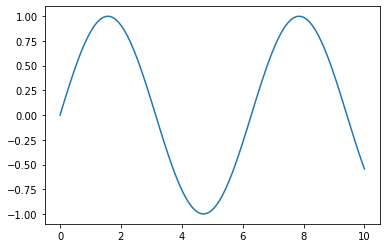

<function __main__.update(w=1.0)>

In [1]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,10,100)

def update(w = 1.0):
    plt.plot(x, np.sin(w * x))
    
interact(update)

By default, ipywidgets will pick what it thinks is a "good" range for your slider based on what you give it as an initial value. You can control the range and step size of your slider by adding an argument `w=(min,max,step)`:

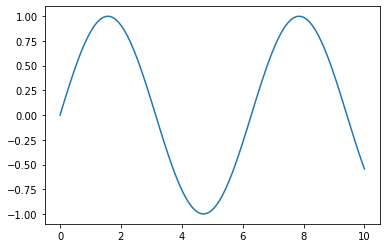

<function __main__.update(w=1.0)>

In [2]:
interact(update, w=(0,5,0.1))

You can also add multiple sliders: 

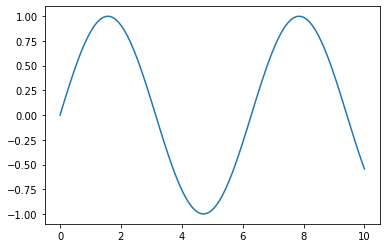

<function __main__.update2(w=1.0, phi=0)>

In [3]:
def update2(w = 1.0, phi= 0):
    plt.plot(x, np.sin(w * x + phi))
    
interact(update2, w=(0,10,0.1), phi=(0,4*np.pi,4*np.pi/100))

**Exercise** Create an interactive widget to make two interactive plots of the amplitude and phase response of the <a href=https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force>sinusoidally driven damped harmonic oscillator</a>.

* Take mass $m = 1$ kg, spring constant $k = 1$ N/m, and friction coefficient $c = 0.1$ as the default values for your sliders. 
* Allow $m$ and $k$ to vary from 0.1 to 3 in steps of 0.1 (kg and N/m respectively)
* Allow $c$ to vary from 0.0 to 2 in steps of 0.01
* Perform your calculations for an oscillating force of $F_0 = 1$ N.

Since your figure will be two plots side-by-side, it is handy to make it bigger than the default size by using the command `plt.figure(figsize=15,5)` before your plotting commands.

For plotting the phase, use the `np.arctan2` function to avoid jumps in phase, and plot your phase in degrees.

Put the parameters of the function in the title of your plots (with units!).

Note that depending on how you program your functions, you might run into "division by zero" warnings. It's probably not a bad idea in general to be awary of these warnings, but in this case, it will interfere with the smoothness of the update with the interactive plot. You can <a href=https://stackoverflow.com/questions/29950557/ignore-divide-by-0-warning-in-numpy>disable the warning</a> here using this command:

```
np.seterr(divide='ignore', invalid='ignore')
```

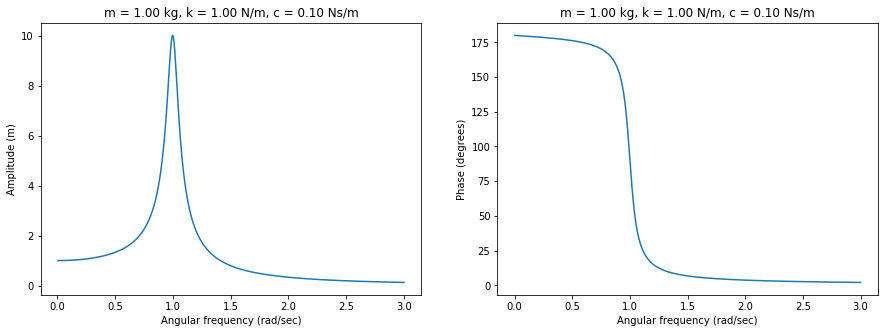

<function __main__.update3(m=1, k=1, c=0.1)>

In [4]:
# Solutions 

np.seterr(divide='ignore', invalid='ignore')

def amp(m,k,c,w):
    zeta = c / 2 / np.sqrt(m*k)
    w0 = np.sqrt(k/m)
    Zm = np.sqrt((2*w0*zeta)**2 + (w0**2-w**2)**2/w**2)
    return 1.0 / m / Zm / w
    
def phase(m,k,c,w):
    zeta = c / 2 / np.sqrt(m*k)
    w0 = np.sqrt(k/m)
    return np.arctan2((2*w0*w*zeta), (w**2-w0**2))*180/np.pi

w = np.linspace(0,3,500)

def update3(m=1, k=1, c=0.1):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(w, amp(m,k,c,w))
    plt.ylabel("Amplitude (m)")
    plt.xlabel("Angular frequency (rad/sec)")
    plt.title("m = %.2f kg, k = %.2f N/m, c = %.2f Ns/m" % (m, k, c))
    plt.subplot(122)
    plt.ylabel("Phase (degrees)")
    plt.xlabel("Angular frequency (rad/sec)")
    plt.title("m = %.2f kg, k = %.2f N/m, c = %.2f Ns/m" % (m, k, c))
    plt.plot(w, phase(m,k,c,w))
    
interact(update3, m=(0.1,3,0.1), k=(0.1,3,0.1), c=(0.01,2,0.01))

**Bonus** As you might have noticed, it's not so handy to work with these sliders that have linear steps: for example, near $c = 0$ at the low end, the changes go too fast with a step size of 0.1, while at the high end, steps of 0.1 are too small. 

Modify your code above so that the sliders adjust m, k, and c in logaritmic (geometric) steps!

* $m$ ranging from 1e-2 to 100 with 50 steps
* $k$ ranging from 1e-2 to 100 with 50 steps
* $c$ ranging from 1e-2 to 100 with 50 steps

Hint / idea: Make your sliders into an index of an array generated by ```np.geomspace()```. The sliders indicators will just show an index, but the title of your plot will show the correct values. 


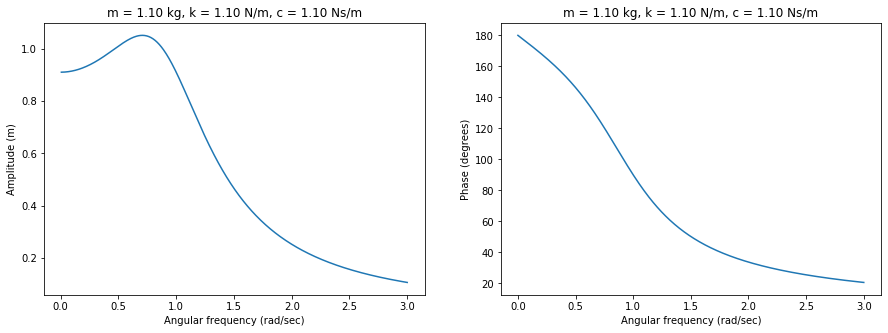

<function __main__.update3(m_ind=25.0, k_ind=25.0, c_ind=25.0)>

In [5]:
# Solutions 

np.seterr(divide='ignore', invalid='ignore')

def amp(m,k,c,w):
    zeta = c / 2 / np.sqrt(m*k)
    w0 = np.sqrt(k/m)
    Zm = np.sqrt((2*w0*zeta)**2 + (w0**2-w**2)**2/(w)**2)
    return 1.0 / m / Zm / (w)
    
def phase(m,k,c,w):
    zeta = c / 2 / np.sqrt(m*k)
    w0 = np.sqrt(k/m)
    return np.arctan2((2*w0*w*zeta), (w**2-w0**2))*180/np.pi

w = np.linspace(0,3,500)

n = 50 # number of steps in slider
m_vals = np.geomspace(1e-2,100,n)
k_vals = np.geomspace(1e-2,100,n)
c_vals = np.geomspace(1e-2,100,n)

def update3(m_ind=n/2, k_ind=n/2, c_ind=n/2):
    m = m_vals[int(m_ind)] 
    k = k_vals[int(k_ind)] 
    c = m_vals[int(c_ind)] 
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(w, amp(m,k,c,w))
    plt.ylabel("Amplitude (m)")
    plt.xlabel("Angular frequency (rad/sec)")
    plt.title("m = %.2f kg, k = %.2f N/m, c = %.2f Ns/m" % (m, k, c))
    plt.subplot(122)
    plt.ylabel("Phase (degrees)")
    plt.xlabel("Angular frequency (rad/sec)")
    plt.title("m = %.2f kg, k = %.2f N/m, c = %.2f Ns/m" % (m, k, c))
    plt.plot(w, phase(m,k,c,w))
    
interact(update3, m_ind=(0,n-1), k_ind=(0,n-1), c_ind=(0,n-1))